In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/AMZN (1).csv')

In [3]:
df_sp500 = pd.read_csv('/content/SHOP.csv')

In [4]:
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.96,159662000,0,0
1,2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.01,139512000,0,0
2,2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.77,183652000,0,0
3,2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.48,159864000,0,0
4,2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.83,177628000,0,0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,116.629997,116.870003,114.309998,115.00,66496700,0,0
1108,2023-05-26 00:00:00-04:00,116.040001,121.500000,116.019997,120.11,96779900,0,0
1109,2023-05-30 00:00:00-04:00,122.370003,122.919998,119.860001,121.66,64314800,0,0
1110,2023-05-31 00:00:00-04:00,121.449997,122.040001,119.169998,120.58,72800800,0,0


In [5]:
df_sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,13.400000,13.914000,13.117000,13.760000,12326000,0.0,0.0
1,2019-01-03 00:00:00-05:00,13.476000,13.626000,12.948000,12.979000,12195000,0.0,0.0
2,2019-01-04 00:00:00-05:00,13.451000,13.950000,13.316000,13.806000,13661000,0.0,0.0
3,2019-01-07 00:00:00-05:00,13.965000,14.585000,13.874000,14.439000,12600000,0.0,0.0
4,2019-01-08 00:00:00-05:00,14.764000,14.982000,14.401000,14.544000,13677000,0.0,0.0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,59.470001,59.580002,57.430000,57.709999,11529500,0.0,0.0
1108,2023-05-26 00:00:00-04:00,58.000000,59.919998,57.794998,59.259998,13636000,0.0,0.0
1109,2023-05-30 00:00:00-04:00,60.599998,61.490002,57.740002,58.189999,12758600,0.0,0.0
1110,2023-05-31 00:00:00-04:00,58.160000,59.110001,56.730000,57.189999,13151600,0.0,0.0


In [6]:
df = pd.concat([df['Close'], df_sp500['Close']], axis=1, join='inner')
df.columns = ['AMZN', '_ex']
print(df.tail())

        AMZN        _ex
1107  115.00  57.709999
1108  120.11  59.259998
1109  121.66  58.189999
1110  120.58  57.189999
1111  122.77  57.939999


In [7]:

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
df

,AMZN,_ex
0,76.96,13.760000
1,75.01,12.979000
2,78.77,13.806000
3,81.48,14.439000
4,82.83,14.544000
...,...,...
1107,115.00,57.709999
1108,120.11,59.259998
1109,121.66,58.189999
1110,120.58,57.189999


In [9]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
exog_vars = '_ex'  # Danh sách các biến độc lập
endog_var = 'AMZN'  # Biến phụ thuộc

In [11]:
endog_train = train_data[endog_var]
exog_train = train_data[exog_vars]

In [12]:
import statsmodels.api as sm

In [13]:
model = sm.tsa.ARIMA(endog_train, order=(1, 0, 1), exog=exog_train)

# Huấn luyện mô hình
model_fit = model.fit()


In [14]:
# Sử dụng dữ liệu kiểm tra và validation để đánh giá mô hình
endog_test = test_data[endog_var]
exog_test = test_data[exog_vars]

endog_val = val_data[endog_var]
exog_val = val_data[exog_vars]

In [15]:
# Dự đoán giá trị cho tập kiểm tra
forecast_test = model_fit.get_forecast(steps=len(test_data), exog=exog_test)
predicted_values_test = forecast_test.predicted_mean

In [16]:
# Dự đoán giá trị cho tập validation
forecast_val = model_fit.get_forecast(steps=len(val_data), exog=exog_val)
predicted_values_val = forecast_val.predicted_mean

In [17]:
# Dự báo 30 ngày tiếp theo
forecast_all = model_fit.get_forecast(steps=30, exog=exog_train[-30:])  # Dự báo 30 ngày tiếp theo

In [18]:
# Trích xuất giá trị dự đoán và khoảng tin cậy cho toàn bộ tập dữ liệu
predicted_values_all = forecast_all.predicted_mean
confidence_interval_all = forecast_all.conf_int()

In [19]:
print(predicted_values_all)
print(confidence_interval_all)

778    164.040962
779    167.777213
780    168.355033
781    170.599035
782    168.811286
783    167.624887
784    168.246435
785    168.419350
786    167.414685
787    166.698588
788    160.441815
789    158.959276
790    157.947194
791    156.788749
792    156.116892
793    157.166569
794    157.576061
795    152.932539
796    154.525441
797    152.332548
798    151.210754
799    150.818494
800    144.545252
801    146.918539
802    144.822448
803    143.714119
804    141.311232
805    143.691237
806    147.622156
807    148.410662
Name: predicted_mean, dtype: float64
     lower AMZN  upper AMZN
778  159.895543  168.186380
779  162.078004  173.476422
780  161.458233  175.251833
781  162.697008  178.501062
782  160.029919  177.592653
783  158.055152  177.194622
784  157.958232  178.534637
785  157.468688  179.370012
786  155.847824  178.981545
787  154.554637  178.842539
788  147.754438  173.129193
789  145.757880  172.160673
790  144.257779  171.636609
791  142.634535  170.942962
792

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Tính MSE cho tập kiểm tra
mse_test = mean_squared_error(test_data[endog_var], predicted_values_test)
print("MSE (Test):", mse_test)

# Tính RMSE cho tập kiểm tra
rmse_test = np.sqrt(mse_test)
print("RMSE (Test):", rmse_test)

MSE (Test): 270.6424509146797
RMSE (Test): 16.45121426870004


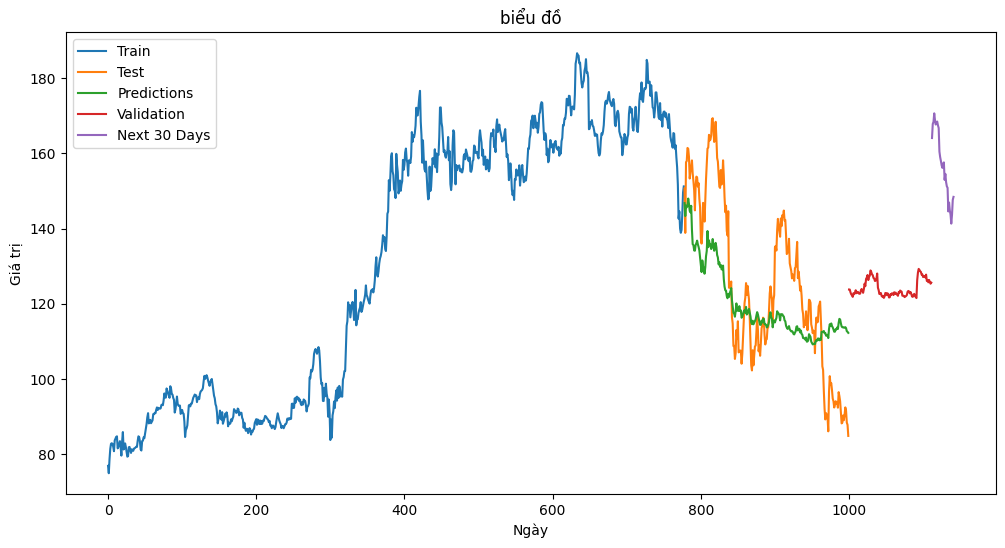

In [21]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[endog_var], label='Train')
plt.plot(test_data.index, test_data[endog_var], label='Test')

plt.plot(test_data.index, predicted_values_test, label='Predictions')
plt.plot(val_data.index, predicted_values_val, label='Validation')
next_30_days_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + 31, step=1)
plt.plot(next_30_days_index, predicted_values_all, label='Next 30 Days')

# Đặt tên cho các trục và tiêu đề
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('biểu đồ')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
